In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import joblib

In [69]:
# Simulate some traffic data
np.random.seed(42)

In [70]:
# Number of observations (simulating different times of day, etc.)
num_samples = 1000

In [71]:
# Simulating vehicle counts (car, motorcycle, bus, truck, van)
car_count = np.random.randint(0, 20, num_samples)
motorcycle_count = np.random.randint(0, 10, num_samples)
bus_count = np.random.randint(0, 5, num_samples)
truck_count = np.random.randint(0, 5, num_samples)
van_count = np.random.randint(0, 5, num_samples)
vehicle_count = car_count + motorcycle_count + bus_count + truck_count + van_count

In [72]:
# Calculating the corresponding green light duration based on the vehicle counts and their multipliers
# We assume a basic multiplier for each vehicle type as mentioned above
green_light_duration = (car_count * 1) + (motorcycle_count * 1) + (bus_count * 2) + (truck_count * 2.5) + (van_count * 1.5) + (vehicle_count * 0.75)

In [73]:
# Create a DataFrame
data = pd.DataFrame({
    'Car': car_count,
    'Motorcycle': motorcycle_count,
    'Bus': bus_count,
    'Truck': truck_count,
    'Van': van_count,
    'total': vehicle_count,
    'Green Light Duration': green_light_duration
})
print(data.head())

   Car  Motorcycle  Bus  Truck  Van  total  Green Light Duration
0    6           6    3      1    1     17                 34.75
1   19           1    3      2    3     28                 56.50
2   14           1    1      2    0     18                 35.50
3   10           0    3      2    4     19                 41.25
4    7           2    4      1    4     18                 39.00


In [74]:
# Split the data into training and testing sets
X = data[['Car', 'Motorcycle', 'Bus', 'Truck', 'Van']]
y = data['Green Light Duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [76]:
# Test the model
y_pred = model.predict(X_test)

In [77]:
# Calculate the model's performance (R-squared score)
r2_score = model.score(X_test, y_test)
print(f'R-squared score: {r2_score:.2f}')

R-squared score: 0.97


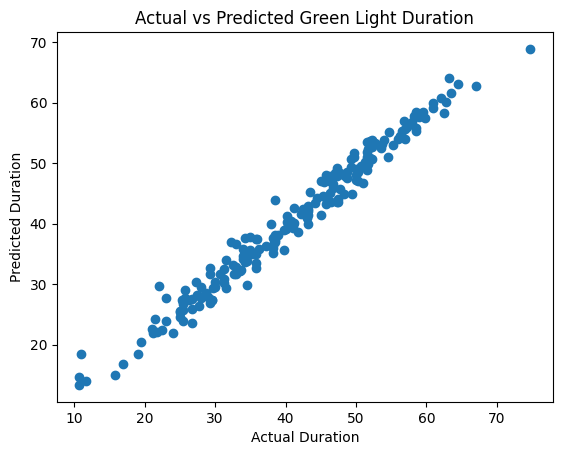

In [78]:
# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title('Actual vs Predicted Green Light Duration')
plt.show()

In [79]:
from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 4.47


In [80]:
# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 2.11


In [81]:
# Predict the green light duration for a new set of vehicle counts
new_vehicle_counts = np.array([[7, 2, 1, 1, 1]])  # Example: 5 cars, 2 motorcycles, 1 bus, 1 truck, 1 van
predicted_duration = model.predict(new_vehicle_counts)
traffic_timing = (int)(predicted_duration[0]+1)
print(f'Predicted Green Light Duration for new vehicle counts: {predicted_duration[0]:.2f} seconds')
print(traffic_timing)

Predicted Green Light Duration for new vehicle counts: 23.27 seconds
24


c:\Users\ferdi\Desktop\Projects\Smart Traffic Management System\trafficenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [82]:
joblib.dump(model, 'traffic_timing_model.pkl')

['traffic_timing_model.pkl']